<!-- Run this notebook in Google Colab to see the training process. -->
<!-- Optionally, use the loaded model in the environment -->
<!-- There is no requirements.txt file as it is recommended to run this in Google Colab -->

<!-- Link to colab notebook: https://colab.research.google.com/drive/14dVoMFreDhjJ7ZMZFoW9R6WLFpqyMe6E#scrollTo=2DUSJy8WZWMr -->

In [4]:
from IPython.display import clear_output

In [1]:
!nvidia-smi   # Check if GPU is being used

Thu Aug 15 02:04:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics    # Install the Ultralytics library which contains the YOLO algorithm
clear_output()

In [5]:
from ultralytics import YOLO
import os
from IPython.display import display,Image, clear_output
!yolo checks

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.3.1+cu121>=1.8.0
torchvision         ✅ 0.18.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


# Import dataset from Roboflow

In [6]:
!pip install roboflow
clear_output()

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="HCJkFaGu92C04hcVVOXx")
project = rf.workspace("miss-nyarko-s2gtm").project("cocoa-disease-detection")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to COCOA-DISEASE-DETECTION-3 in yolov8:: 100%|██████████| 6030/6030 [00:01<00:00, 3415.55it/s]


*  ***Set the test,train and val paths to their right values in the data.yaml configuration file***

# Train the model


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/COCOA-DISEASE-DETECTION-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

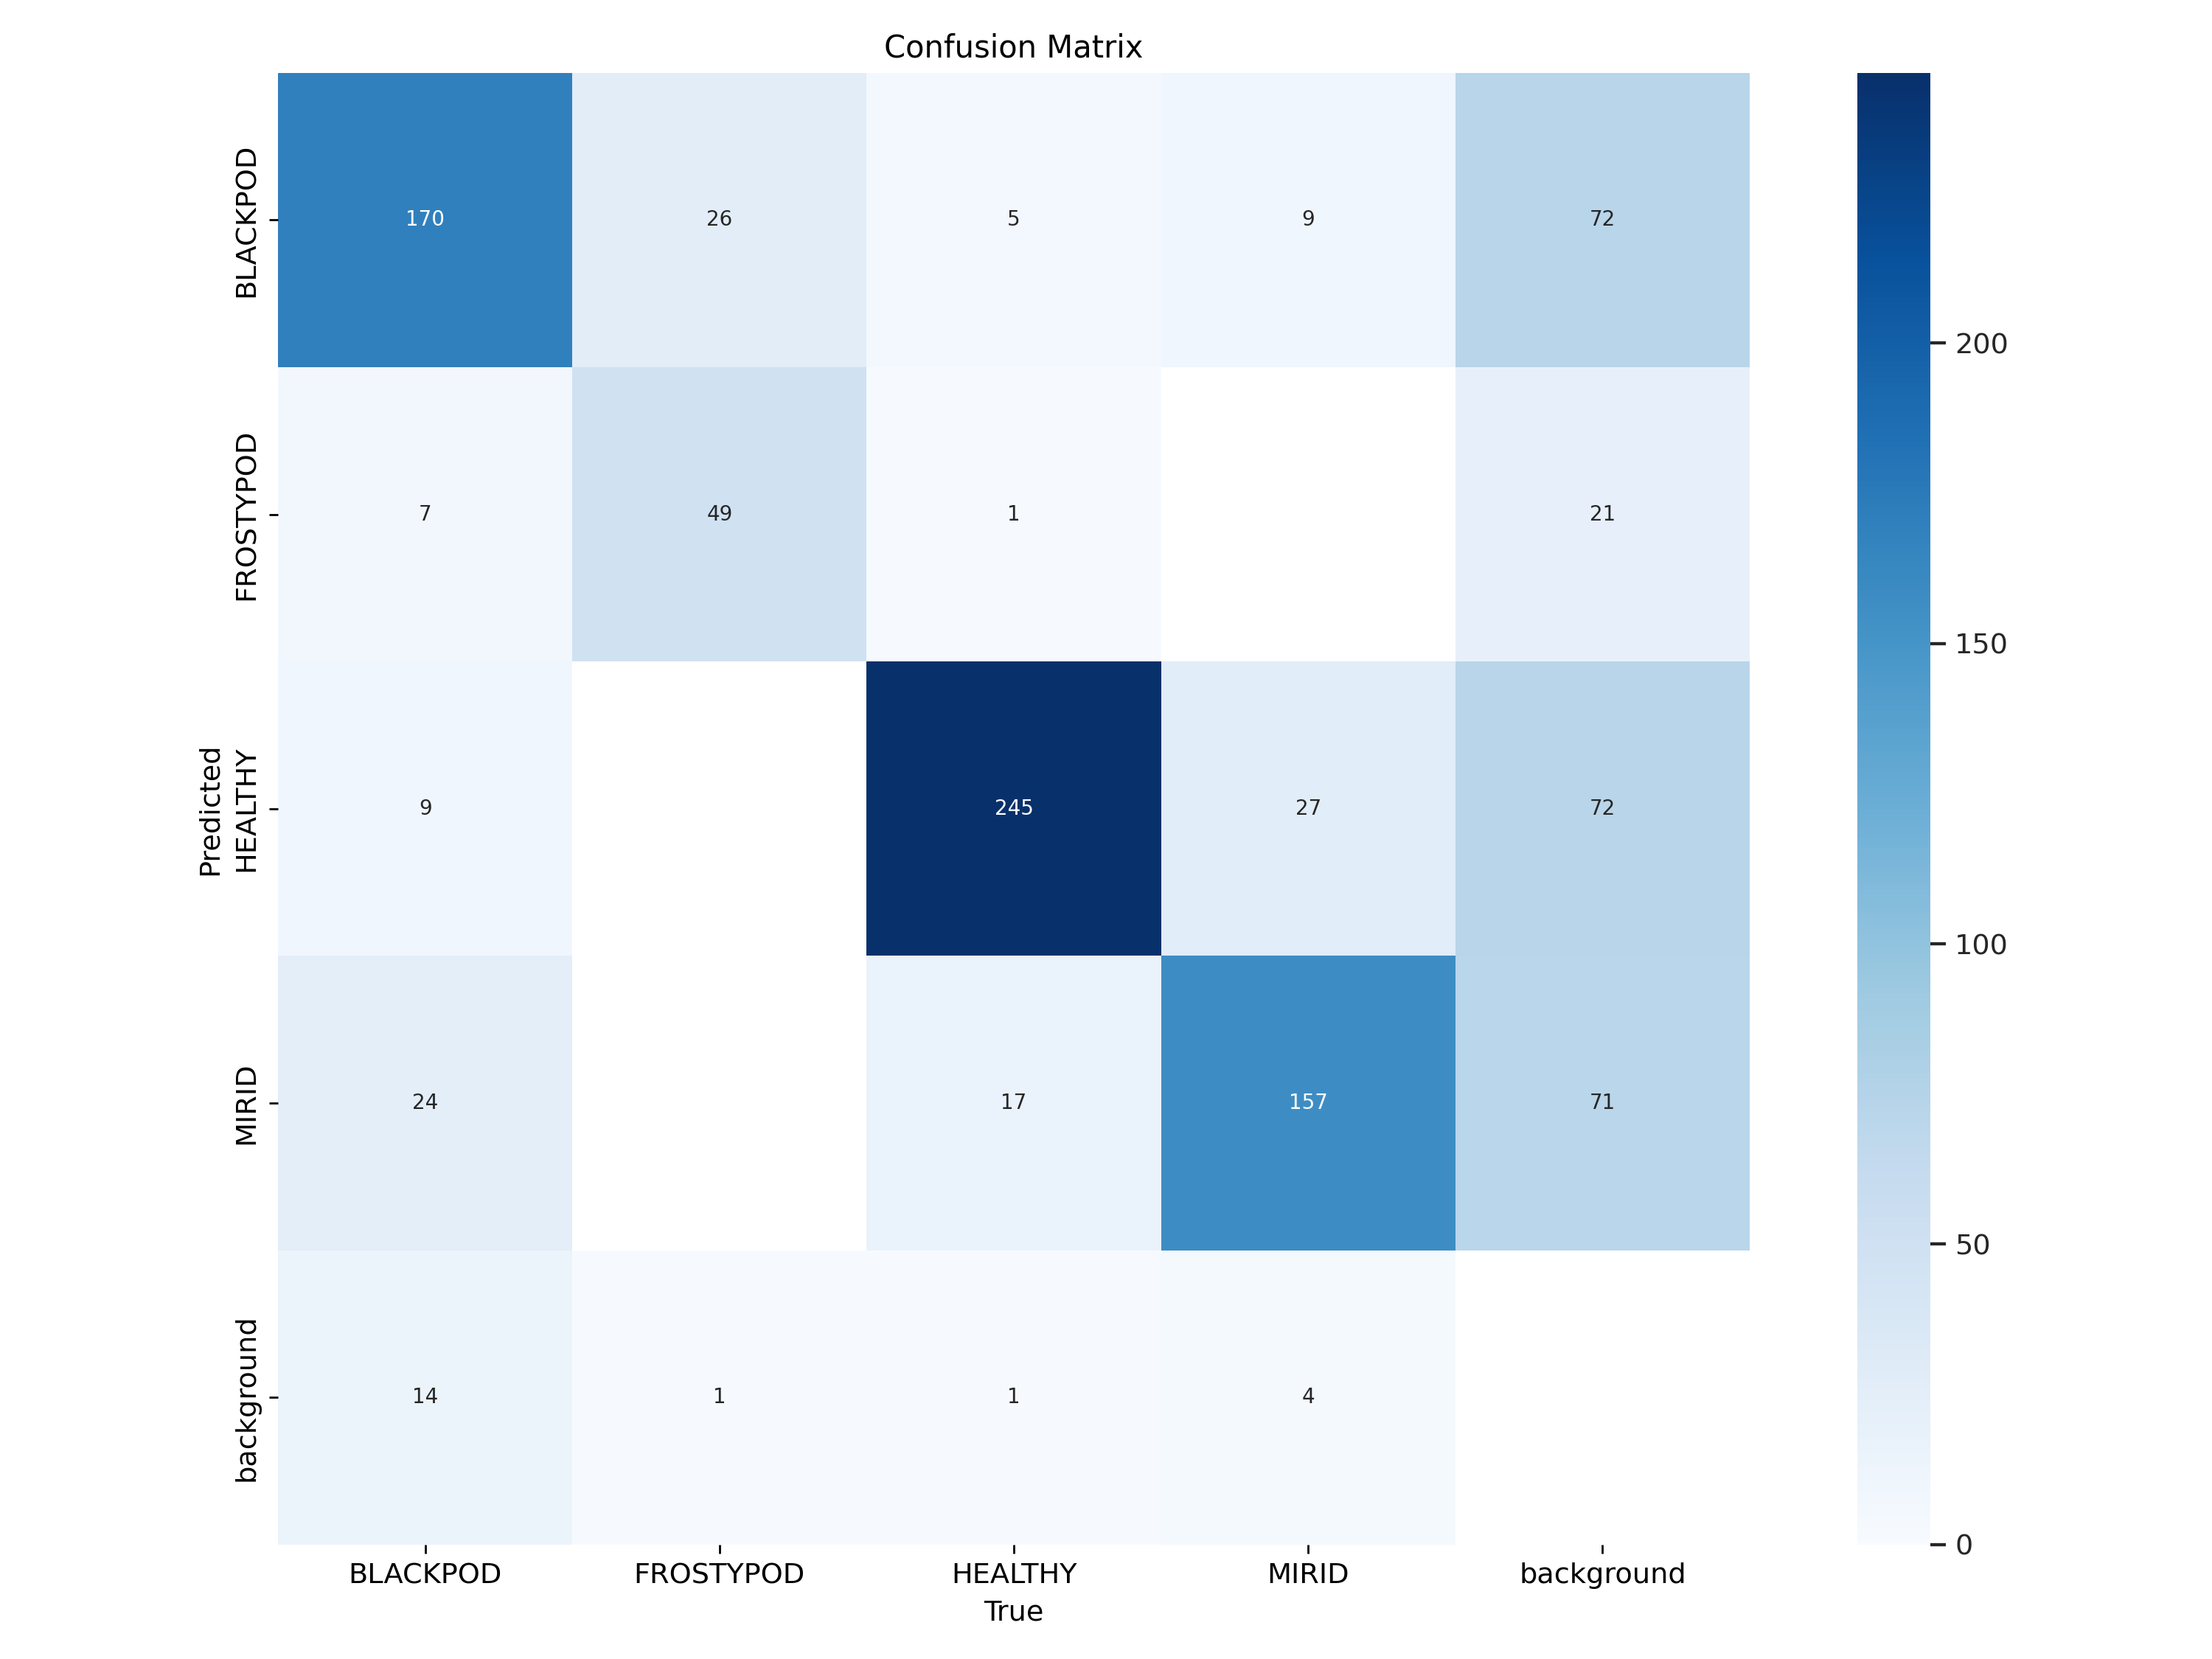

In [11]:
Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=600)  # Plot the confusion matrix

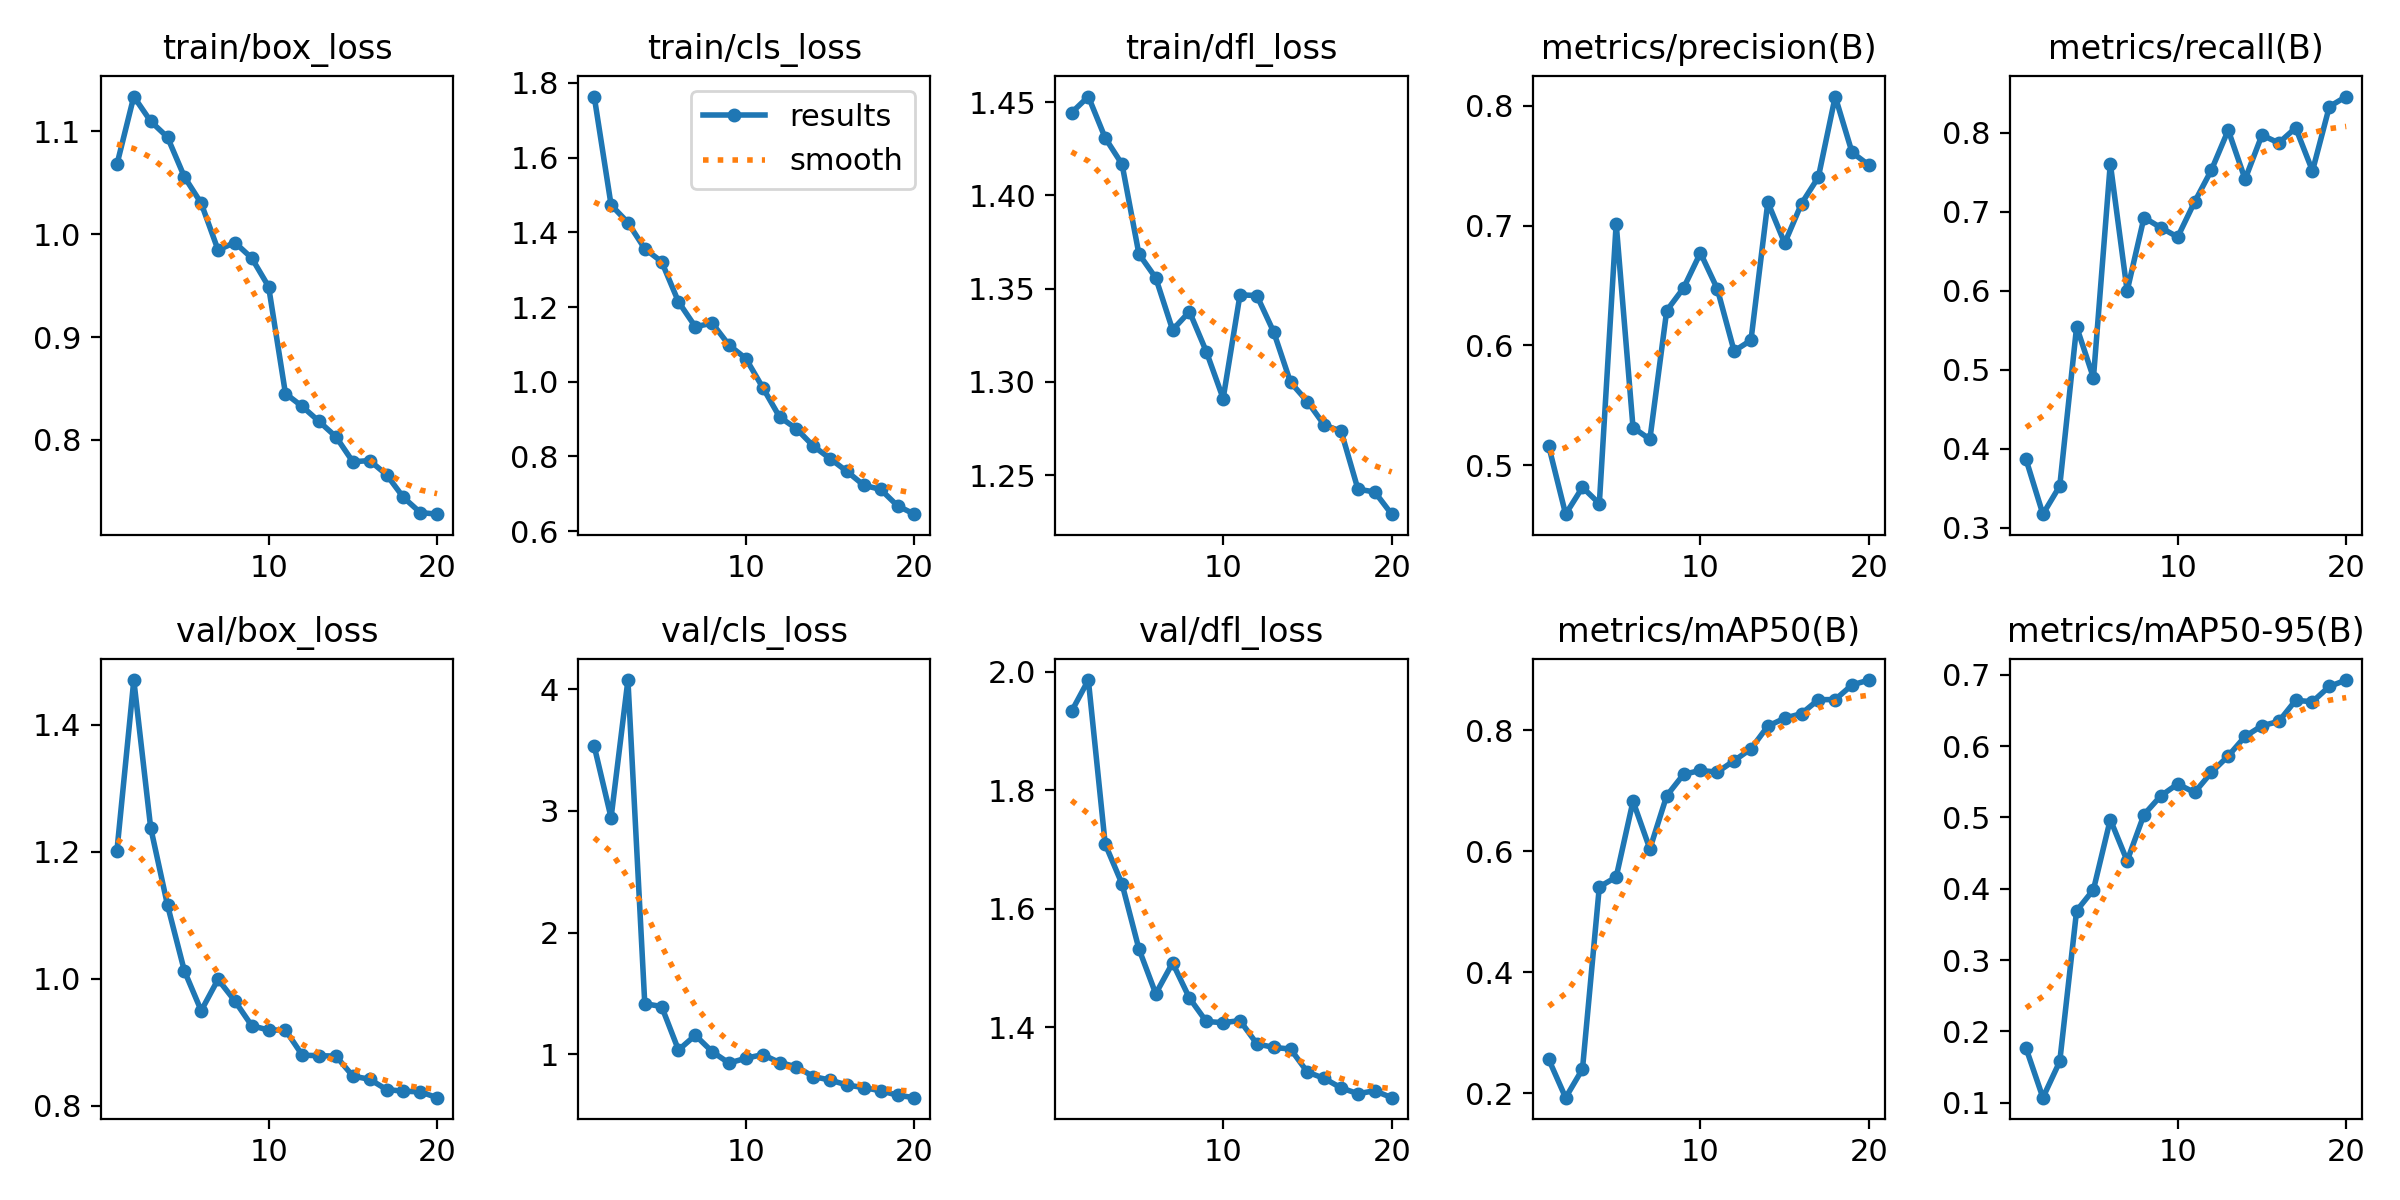

In [12]:
Image(filename=f"/content/runs/detect/train2/results.png", width=1000)  # Plot the results. YOLO is so practical and efficient to use. Minimal need for external data visualization libraries.

# Validate the new model on the validation dataset

In [13]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt conf=0.5 data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/COCOA-DISEASE-DETECTION-3/valid/labels.cache... 594 images, 0 backgrounds, 0 corrupt: 100% 594/594 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:17<00:00,  2.21it/s]
                   all        594        766       0.82      0.759      0.825      0.675
              BLACKPOD        192        224      0.815      0.768      0.826      0.642
             FROSTYPOD         59         76       0.86      0.566       0.73      0.586
               HEALTHY        233        269      0.826      0.885      0.896      0.759
                 MIRID        173        197      0.778      0.817      0.849      0.712
Speed: 0.5ms preprocess, 21.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Le

# Test the model on unseen data

In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 data={dataset.location}/data.yaml source={dataset.location}/test/images

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011000_jpg.rf.3e2fa51dbd2516e8038e5ad7ef184dd1.jpg: 640x640 1 BLACKPOD, 1 MIRID, 37.2ms
image 2/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011006_jpg.rf.c7720536c82bd3bd51cb1c51141276ca.jpg: 640x640 1 BLACKPOD, 37.1ms
image 3/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011009_jpg.rf.2925f0ccfdf5165bfc496f8a322c611c.jpg: 640x640 1 FROSTYPOD, 37.1ms
image 4/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011014_jpg.rf.e8ecb15f6bbc3d29acea144624c48233.jpg: 640x640 2 MIRIDs, 37.1ms
image 5/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011016_jpg.rf.007f7bf18277d843c4aa13f9775b009d.jpg: 640x640 1 MIRID, 37.0ms
image 6/316 /content/COCOA-DISEASE-DETECTION-3/test/images/00011018_jpg.rf.967f73be8dc6147c30f84b179b7c6cc0.jpg: 640x640 1 M

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob("/content/runs/detect/train2/exp/*.jpg")[:3]:
    display(Image(filename=image_path, width=600))